In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing

In [28]:
data=pd.read_csv('Mall_Customers - KNN and KMeans.csv')
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


<function matplotlib.pyplot.show(*args, **kw)>

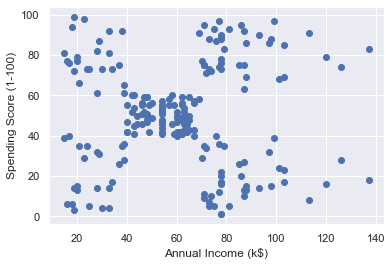

In [29]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show

In [30]:
x=data.copy()

In [31]:
kmeans=KMeans(5)
kmeans.fit(x)

KMeans(n_clusters=5)

In [32]:
clusters=x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

<function matplotlib.pyplot.show(*args, **kw)>

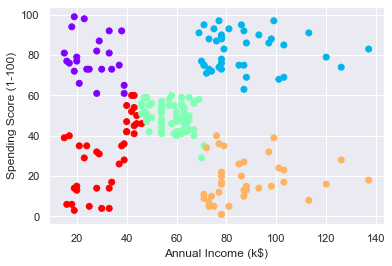

In [33]:
plt.scatter(clusters['Annual Income (k$)'],clusters['Spending Score (1-100)'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show

In [34]:
x_scaled=preprocessing.scale(x)
x_scaled

array([[-1.7234121 , -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 , -0.56336851, -1.66266033, -0.39597992],
       [-1.63680847, -1.20926872, -1.66266033,  1.00159627],
       [-1.61948775, -0.27630176, -1.62449091, -1.71591298],
       [-1.60216702, -1.13750203, -1.62449091,  1.70038436],
       [-1.5848463 ,  1.80493225, -1.58632148, -1.83237767],
       [-1.56752558, -0.6351352 , -1.58632148,  0.84631002],
       [-1.55020485,  2.02023231, -1.58632148, -1.4053405 ],
       [-1.53288413, -0.27630176, -1.58632148,  1.89449216],
       [-1.5155634 ,  1.37433211, -1.54815205, -1.36651894],
       [-1.49824268, -1.06573534, -1.54815205,  1.04041783],
       [-1.48092195, -0.13276838, -1.54815205, -1.44416206],
       [-1.46360123, -1.20926872, -1.54815205,  1.11806095],
       [-1.4462805 , -0.

In [35]:
wcss = []
for i in range(1,200):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[800.0000000000003,
 515.6688891233368,
 375.2643070614756,
 259.7059364995401,
 209.5783837699584,
 160.97567568819875,
 144.67273835360632,
 130.7205333775289,
 116.97048744488866,
 103.61270144778922,
 91.7893661038518,
 85.65094285993688,
 77.37575978275085,
 73.87724554185631,
 70.77277163715489,
 67.88723131622898,
 63.00481575177304,
 59.777777650976375,
 56.955823108106145,
 55.896037482446566,
 53.44443136779479,
 51.44439298659067,
 50.18255733795196,
 47.94986628134427,
 45.88481064697713,
 43.59670969783353,
 41.3868142230391,
 39.70345671415919,
 37.736842126253634,
 36.192645355580815,
 34.684908197967545,
 33.12096693326614,
 33.75662623174318,
 31.51397302648984,
 29.667725173511304,
 29.398441158309936,
 28.43523471243757,
 27.425948503840935,
 26.77419084213252,
 25.69231062943741,
 24.55526780687985,
 24.32834460769021,
 23.827866303599656,
 22.38609240807592,
 21.644104102469658,
 21.74897037848195,
 20.428384428587126,
 20.51515905675138,
 19.82780133724388,
 19.86

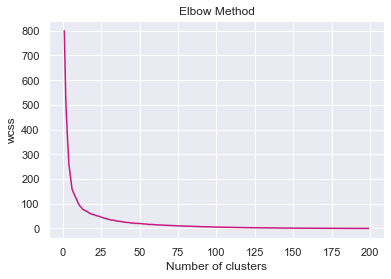

In [36]:
plt.plot(range(1,200),wcss, c="#c51b7e")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show() 

In [37]:
kmeans_new=KMeans(12)
kmeans.fit(x_scaled)
cluster_new=x.copy()
cluster_new['cluster_pred']=kmeans_new.fit_predict(x_scaled)
cluster_new

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster_pred
0,1,19,15,39,2
1,2,21,15,81,8
2,3,20,16,6,2
3,4,23,16,77,8
4,5,31,17,40,2
...,...,...,...,...,...
195,196,35,120,79,5
196,197,45,126,28,9
197,198,32,126,74,5
198,199,32,137,18,9


<function matplotlib.pyplot.show(*args, **kw)>

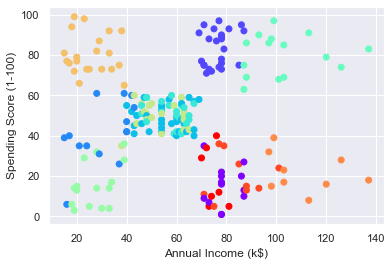

In [38]:
plt.scatter(clusters['Annual Income (k$)'],clusters['Spending Score (1-100)'],c=cluster_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show

In [46]:
model = KMeans(n_clusters = 12)

In [47]:
model.fit(cluster_new)

KMeans(n_clusters=12)

In [48]:
model.labels_

array([ 1,  5,  1,  5,  1,  5,  1,  5,  1,  5,  1,  5,  1,  5,  1,  5,  1,
        5,  1,  5,  1,  5,  1,  5,  1,  5,  1,  5,  1,  5,  1,  5,  1,  5,
        1,  5,  1,  5,  1,  5, 10,  5, 10,  3, 10,  3, 10,  3,  3,  3, 10,
        3,  3, 10, 10, 10, 10, 10,  3, 10, 10,  3, 10, 10, 10,  3,  3, 10,
        3,  3, 10, 11, 11, 11, 11,  3, 11, 11,  6, 11, 11, 11, 11, 11,  6,
       11, 11,  6,  6, 11, 11,  6, 11, 11,  6,  6, 11,  6,  0,  6,  6,  0,
        0,  6,  0,  6,  0,  0,  0,  0,  0,  6,  0,  6,  6,  6,  0,  0,  0,
        0,  6,  0,  0,  9,  8,  9,  0,  9,  8,  9,  8,  9,  8,  9,  8,  9,
        8,  9,  8,  9,  8,  9,  8,  9,  8,  9,  8,  9,  8,  9,  8,  4,  8,
        4,  8,  4,  8,  4,  8,  4,  8,  4,  8,  4,  2,  4,  2,  4,  2,  4,
        2,  4,  2,  4,  2,  4,  2,  4,  2,  7,  2,  7,  2,  7,  2,  7,  2,
        7,  2,  7,  2,  7,  2,  7,  2,  7,  2,  7,  2,  7])

In [49]:
cluster_new.insert(4,"Class",model.labels_)

In [50]:
cluster_new.replace({'Class': {0:"0",1:"1",2:"2",3:"3",4:"4",5:"5",6:"6",7:"7",8:"8",9:"9",10:"10",11:"11",12:"12"}})

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Class,cluster_pred
0,1,19,15,39,1,2
1,2,21,15,81,5,8
2,3,20,16,6,1,2
3,4,23,16,77,5,8
4,5,31,17,40,1,2
...,...,...,...,...,...,...
195,196,35,120,79,7,5
196,197,45,126,28,2,9
197,198,32,126,74,7,5
198,199,32,137,18,2,9


In [51]:
cluster_new['Class'].value_counts()

5     21
1     20
8     19
11    18
2     18
10    17
6     17
0     17
9     14
4     14
3     14
7     11
Name: Class, dtype: int64

In [52]:
cluster_new.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Class', 'cluster_pred'],
      dtype='object')

In [53]:
X=cluster_new[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
X[0:5]

array([[ 1, 19, 15, 39],
       [ 2, 21, 15, 81],
       [ 3, 20, 16,  6],
       [ 4, 23, 16, 77],
       [ 5, 31, 17, 40]], dtype=int64)

In [54]:
y=cluster_new['Class'].values
y[0:5]

array([1, 5, 1, 5, 1])

In [55]:
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.7234121 , -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 , -0.56336851, -1.66266033, -0.39597992]])

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=4)
print("Train set:", X_train.shape, y_train.shape)
print("Test set:",X_test.shape,y_test.shape)

Train set: (160, 4) (160,)
Test set: (40, 4) (40,)


In [57]:
from sklearn.neighbors import KNeighborsClassifier

k=5
neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh

KNeighborsClassifier()

In [58]:
y_hat=neigh.predict(X_test)
y_hat[0:5]

array([5, 6, 8, 4, 5])

In [59]:
from sklearn import metrics
print("Eğitim verisi doğruluğu:", metrics.accuracy_score(y_train,neigh.predict(X_train)))
print("Test verisi doğruluğu:", metrics.accuracy_score(y_test,y_hat))

Eğitim verisi doğruluğu: 0.94375
Test verisi doğruluğu: 0.9


In [60]:
Ks = 10

mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.9  , 0.85 , 0.875, 0.825, 0.9  , 0.85 , 0.9  , 0.925, 0.9  ])

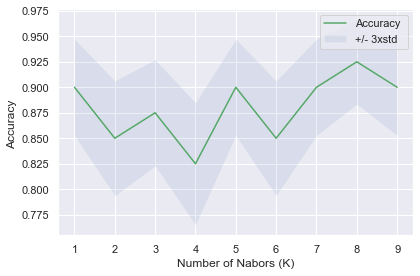

In [61]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [62]:
print( "En yüksek Doğruluk=", mean_acc.max(), "K=", mean_acc.argmax()+1,"olduğunda gerçekleşti.")

En yüksek Doğruluk= 0.925 K= 8 olduğunda gerçekleşti.


In [63]:
neigh.fit(X_train,y_train)
prediction = neigh.predict(X_test)
print('Prediction: {}'.format(prediction))
print('With KNN (K=8) accuracy is: ',neigh.score(X_test,y_test))

Prediction: [ 5  6  8  4  5  6  0  4  6  7  3  7  7  9  2  2  5  4  8  6 11  0  9  1
  3  6  0  1  1  2 11  1  4  3  9  0  6 11  7 10]
With KNN (K=8) accuracy is:  0.9
